In the real estate market, accurately predicting the price of a house is crucial for both buyers and sellers to make informed decisions. However, the process is often complex due to the multitude of factors that can influence a house's price, such as its size, location, age, and amenities. Traditional methods of price estimation can be time-consuming and may not always capture the nuanced interactions between these factors.

Using machine learning methods develop a model to predict the price of houses given a data with 5000 records including the area, number of bedrooms, bathrooms, garage, age, etc

In [1]:
#importing necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data
df = pd.read_csv('house_prices_dirty.csv')

In [3]:
# price is the target

In [4]:
#first 5 rows
df.head()

,Area,Bedrooms,Bathrooms,Location,Age,Garage,Price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,NaN,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


### EDA

In [5]:
#columns in the dataframe
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Location', 'Age', 'Garage', 'Price'], dtype='object')

In [6]:
# new_name = []
# for x in df.columns:
#     new_name.append(x.lower())

In [7]:
# new_name

In [8]:
# list comprehension
[x.lower() for x in df.columns]

['area', 'bedrooms', 'bathrooms', 'location', 'age', 'garage', 'price']

In [9]:
# changing column names to small letters
df.columns = [x.lower() for x in df.columns]

In [10]:
df.columns

Index(['area', 'bedrooms', 'bathrooms', 'location', 'age', 'garage', 'price'], dtype='object')

In [11]:
#top 5 rows
df.head()

,area,bedrooms,bathrooms,location,age,garage,price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,NaN,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


In [12]:
#short description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       5000 non-null   int64  
 1   bedrooms   5000 non-null   int64  
 2   bathrooms  5000 non-null   int64  
 3   location   4969 non-null   object 
 4   age        4907 non-null   float64
 5   garage     5000 non-null   int64  
 6   price      5000 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 273.6+ KB


In [13]:
#a simple statistical description
df.describe()

,area,bedrooms,bathrooms,age,garage,price
count,5000.000000,5000.0000,5000.000000,4907.000000,5000.000000,5.000000e+03
mean,2567.655200,2.9982,1.976600,60.129407,1.008800,5.573903e+05
std,1120.887667,1.4140,0.819382,34.313983,0.819547,2.211179e+05
min,600.000000,1.0000,1.000000,1.000000,0.000000,4.047702e+04
25%,1592.750000,2.0000,1.000000,30.000000,0.000000,3.783680e+05
50%,2561.500000,3.0000,2.000000,60.000000,1.000000,5.477114e+05
75%,3550.250000,4.0000,3.000000,89.000000,2.000000,7.254004e+05
max,4499.000000,5.0000,3.000000,119.000000,2.000000,1.192210e+06


In [14]:
#a simple statistical description for the Categorical column
# 'O' - letter represents object
df.describe(include='O')

,location
count,4969
unique,5
top,Location2
freq,1051


In [15]:
#checking for missing values
df.isnull()

,area,bedrooms,bathrooms,location,age,garage,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [16]:
#showing that False represents 0 in Python
False ==  0

True

In [17]:
# checking if there is missing value
df.isnull().sum()

area          0
bedrooms      0
bathrooms     0
location     31
age          93
garage        0
price         0
dtype: int64

There are missing values in the data specifically for Location and Age

### Dealing with missing values

In [18]:
#either of these are the same

# df['location']
# df.location

In [19]:
#showing counts of location categories
df.location.value_counts()

Location2    1051
Location4     985
Location1     985
Location5     984
Location3     964
Name: location, dtype: int64

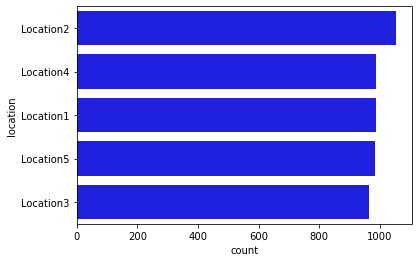

In [20]:
#count of all the location where the data was gotten from
sns.countplot(y=df.location, color='blue', order = df.location.value_counts().keys());

We will fill Location with the mode which is location2

In [21]:
#getting the most occuring location
df.location.mode()[0]

'Location2'

In [22]:
type(df.location.mode())

pandas.core.series.Series

In [23]:
#getting the mode
most_location = df.location.mode()[0]

In [24]:
#either of the code works

# df.location.fillna(most_location, inplace=True)
df.location = df.location.fillna(most_location)

In [25]:
df.isnull().sum()

area          0
bedrooms      0
bathrooms     0
location      0
age          93
garage        0
price         0
dtype: int64

#### for age

In [26]:
df.age.value_counts()

111.0    59
54.0     55
112.0    54
36.0     52
81.0     52
         ..
82.0     32
117.0    32
113.0    31
93.0     30
27.0     27
Name: age, Length: 119, dtype: int64

In [27]:
# getting mean values and converting it to integer
int(df.age.mean())

60

In [28]:
age_mean = int(df.age.mean())

In [29]:
#filling the missing values with mean
df.age = df.age.fillna(age_mean)

In [30]:
df.isna().sum()

area         0
bedrooms     0
bathrooms    0
location     0
age          0
garage       0
price        0
dtype: int64

#### Univariate Analysis

In [31]:
df.bedrooms.value_counts()

2    1039
5    1008
1     985
4     984
3     984
Name: bedrooms, dtype: int64

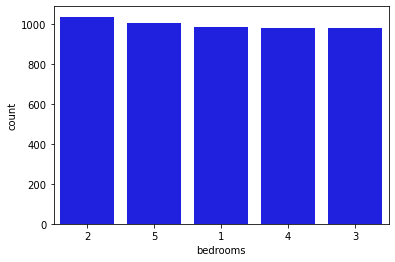

In [32]:
#count of all the number of bedrooms in descending order
sns.countplot(x=df.bedrooms, color='blue', order = df.bedrooms.value_counts().keys() );

In [33]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,Location2,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


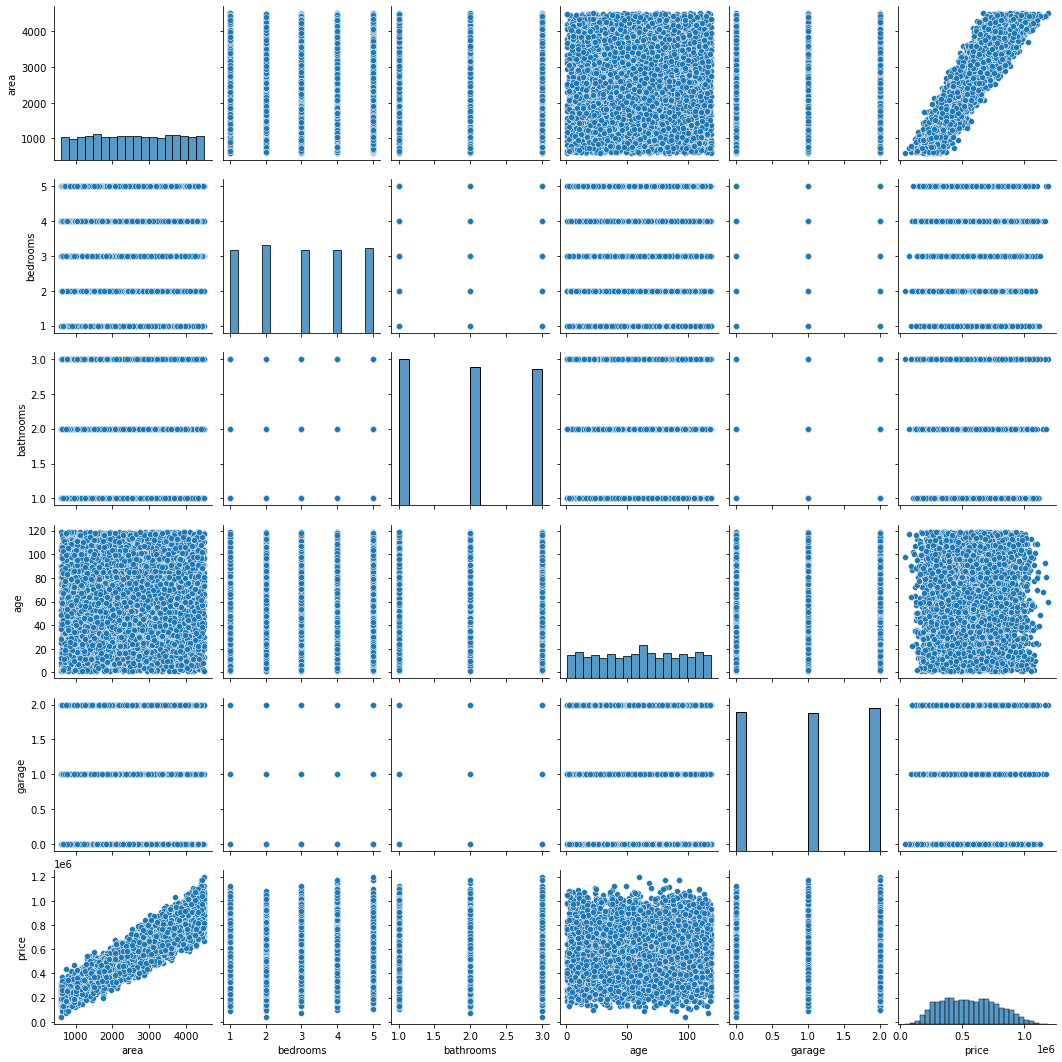

In [34]:
# a quick plot comparing columns
sns.pairplot(df, kind='scatter')
plt.show()

In [35]:
# check for all houses that are more than 119 years

In [36]:
# checking the correlations between features
df.drop('location', axis=1).corr()

,area,bedrooms,bathrooms,age,garage,price
area,1.000000,-0.002732,-0.009464,0.017319,-0.013903,0.919300
bedrooms,-0.002732,1.000000,-0.007115,0.005864,-0.006719,0.035857
bathrooms,-0.009464,-0.007115,1.000000,0.014557,-0.000587,0.024903
age,0.017319,0.005864,0.014557,1.000000,-0.007465,-0.001968
garage,-0.013903,-0.006719,-0.000587,-0.007465,1.000000,0.027198
price,0.919300,0.035857,0.024903,-0.001968,0.027198,1.000000


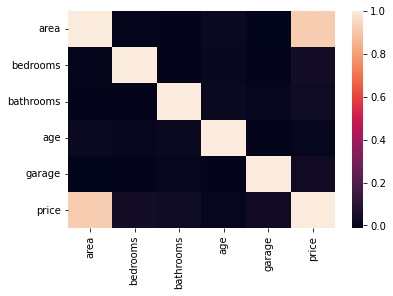

In [37]:
#you can also try this
sns.heatmap(df.drop('location', axis=1).corr());

### Feature Engineering

In [38]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price
0,3774,4,2,Location3,23.0,0,814142.617200
1,4107,2,2,Location3,46.0,0,836259.082065
2,1460,3,3,Location2,113.0,1,296721.573960
3,1894,5,2,Location2,30.0,0,399099.591046
4,1730,3,2,Location5,67.0,0,441862.941002


In [39]:
# adding the rooms
df['rooms'] = df['bedrooms'] + df['bathrooms']

In [40]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms
0,3774,4,2,Location3,23.0,0,814142.617200,6
1,4107,2,2,Location3,46.0,0,836259.082065,4
2,1460,3,3,Location2,113.0,1,296721.573960,6
3,1894,5,2,Location2,30.0,0,399099.591046,7
4,1730,3,2,Location5,67.0,0,441862.941002,5


In [41]:
#generating new features
#average room per area
df['average_room_area'] = df['area'] / df['bedrooms']

In [42]:
df['area_age'] = df['area'] / df['age']
df['age_bed'] = df['age'] / df['bedrooms']
# df['age_bed_x'] = df['age'] * df['bedrooms']
# df['average_room'] = df['area'] / df['rooms']

In [43]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room_area,area_age,age_bed
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000,164.086957,5.750000
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000,89.282609,23.000000
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667,12.920354,37.666667
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000,63.133333,6.000000
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667,25.820896,22.333333


In [44]:
#this returns only the unique values in location
df.location.unique()

array(['Location3', 'Location2', 'Location5', 'Location4', 'Location1'],
      dtype=object)

In [45]:
location_dic = {'Location3':1, 'Location2':2, 'Location5':3, 'Location4':4, 'Location1':5}

In [46]:
#encoding
df['location_new'] = df.location.replace(location_dic)

In [47]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room_area,area_age,age_bed,location_new
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000,164.086957,5.750000,1
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000,89.282609,23.000000,1
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667,12.920354,37.666667,2
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000,63.133333,6.000000,2
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667,25.820896,22.333333,3


In [48]:
#another way to encode

In [49]:
#this is to reverse location
location_dic_rev = {1:'Location3', 2:'Location2', 3:'Location5', 4:'Location4', 5:'Location1'}
df.location = df.location.replace(location_dic_rev)

In [50]:
df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room_area,area_age,age_bed,location_new
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000,164.086957,5.750000,1
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000,89.282609,23.000000,1
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667,12.920354,37.666667,2
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000,63.133333,6.000000,2
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667,25.820896,22.333333,3


In [51]:
#one-hot-encoding
# so you might be getting a True and False so just use the second line

# pd.get_dummies(df.location)
# pd.get_dummies(df.location, dtype=int)

In [52]:
#Function for Frequency encoding
def freq_encoding(data, cols):
    for i in cols:
        encoding = data.groupby(i).size()
        encoding = encoding/len(data)
        data[str(i) + 'enc'] = data[i].map(encoding)
    return data

In [53]:
freq_encoding(df, df[['location', 'bedrooms']])

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room_area,area_age,age_bed,location_new,locationenc,bedroomsenc
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000,164.086957,5.750000,1,0.1928,0.1968
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000,89.282609,23.000000,1,0.1928,0.2078
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667,12.920354,37.666667,2,0.2164,0.1968
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000,63.133333,6.000000,2,0.2164,0.2016
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667,25.820896,22.333333,3,0.1968,0.1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,736,3,2,Location3,118.0,2,174089.796256,5,245.333333,6.237288,39.333333,1,0.1928,0.1968
4996,2546,2,1,Location4,24.0,2,633153.590770,3,1273.000000,106.083333,12.000000,4,0.1970,0.2078
4997,2297,1,2,Location2,66.0,0,456620.765104,3,2297.000000,34.803030,66.000000,2,0.2164,0.1970
4998,1027,4,3,Location5,95.0,2,286274.647796,7,256.750000,10.810526,23.750000,3,0.1968,0.1968


In [54]:
#just storing the dummies to a variable
location_dummies = pd.get_dummies(df.location)

In [55]:
new_df = pd.concat([df, location_dummies], axis=1)

In [56]:
new_df.head()

,area,bedrooms,bathrooms,location,age,garage,price,rooms,average_room_area,area_age,age_bed,location_new,locationenc,bedroomsenc,Location1,Location2,Location3,Location4,Location5
0,3774,4,2,Location3,23.0,0,814142.617200,6,943.500000,164.086957,5.750000,1,0.1928,0.1968,0,0,1,0,0
1,4107,2,2,Location3,46.0,0,836259.082065,4,2053.500000,89.282609,23.000000,1,0.1928,0.2078,0,0,1,0,0
2,1460,3,3,Location2,113.0,1,296721.573960,6,486.666667,12.920354,37.666667,2,0.2164,0.1968,0,1,0,0,0
3,1894,5,2,Location2,30.0,0,399099.591046,7,378.800000,63.133333,6.000000,2,0.2164,0.2016,0,1,0,0,0
4,1730,3,2,Location5,67.0,0,441862.941002,5,576.666667,25.820896,22.333333,3,0.1968,0.1968,0,0,0,0,1


In [57]:
new_df.columns

Index(['area', 'bedrooms', 'bathrooms', 'location', 'age', 'garage', 'price',
       'rooms', 'average_room_area', 'area_age', 'age_bed', 'location_new',
       'locationenc', 'bedroomsenc', 'Location1', 'Location2', 'Location3',
       'Location4', 'Location5'],
      dtype='object')

In [58]:
# we have to choose just one type of the encoding
# so we have to drop some columns

# to_drop = ['location', 'Location1', 'Location2', 'Location3', 'Location4', 'Location5']

to_drop = [ 'location','location_new']

new_df = new_df.drop(to_drop, axis=1)

In [59]:
new_df

,area,bedrooms,bathrooms,age,garage,price,rooms,average_room_area,area_age,age_bed,locationenc,bedroomsenc,Location1,Location2,Location3,Location4,Location5
0,3774,4,2,23.0,0,814142.617200,6,943.500000,164.086957,5.750000,0.1928,0.1968,0,0,1,0,0
1,4107,2,2,46.0,0,836259.082065,4,2053.500000,89.282609,23.000000,0.1928,0.2078,0,0,1,0,0
2,1460,3,3,113.0,1,296721.573960,6,486.666667,12.920354,37.666667,0.2164,0.1968,0,1,0,0,0
3,1894,5,2,30.0,0,399099.591046,7,378.800000,63.133333,6.000000,0.2164,0.2016,0,1,0,0,0
4,1730,3,2,67.0,0,441862.941002,5,576.666667,25.820896,22.333333,0.1968,0.1968,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,736,3,2,118.0,2,174089.796256,5,245.333333,6.237288,39.333333,0.1928,0.1968,0,0,1,0,0
4996,2546,2,1,24.0,2,633153.590770,3,1273.000000,106.083333,12.000000,0.1970,0.2078,0,0,0,1,0
4997,2297,1,2,66.0,0,456620.765104,3,2297.000000,34.803030,66.000000,0.2164,0.1970,0,1,0,0,0
4998,1027,4,3,95.0,2,286274.647796,7,256.750000,10.810526,23.750000,0.1968,0.1968,0,0,0,0,1


In [60]:
#this is how likely our linear regression formular will look like
#weights and bias
# y = mx + m2x2 + m3x3 + m4x4 + m5x5 + m6x6....m8x8 + c

## Model Selection

We select the Decision Tree Regressor and Linear Regression as our model.

In [61]:
#scikit-learn package

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Training and Evaluation

Let's split our data into training and testing sets, train our model, and evaluate its performance.

In [63]:
#importing the needed function from Sklearn
from sklearn.model_selection import train_test_split

In [64]:
#X is features and y is target
X = new_df.drop('price', axis=1)
y= new_df.price

In [65]:
X

,area,bedrooms,bathrooms,age,garage,rooms,average_room_area,area_age,age_bed,locationenc,bedroomsenc,Location1,Location2,Location3,Location4,Location5
0,3774,4,2,23.0,0,6,943.500000,164.086957,5.750000,0.1928,0.1968,0,0,1,0,0
1,4107,2,2,46.0,0,4,2053.500000,89.282609,23.000000,0.1928,0.2078,0,0,1,0,0
2,1460,3,3,113.0,1,6,486.666667,12.920354,37.666667,0.2164,0.1968,0,1,0,0,0
3,1894,5,2,30.0,0,7,378.800000,63.133333,6.000000,0.2164,0.2016,0,1,0,0,0
4,1730,3,2,67.0,0,5,576.666667,25.820896,22.333333,0.1968,0.1968,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,736,3,2,118.0,2,5,245.333333,6.237288,39.333333,0.1928,0.1968,0,0,1,0,0
4996,2546,2,1,24.0,2,3,1273.000000,106.083333,12.000000,0.1970,0.2078,0,0,0,1,0
4997,2297,1,2,66.0,0,3,2297.000000,34.803030,66.000000,0.2164,0.1970,0,1,0,0,0
4998,1027,4,3,95.0,2,7,256.750000,10.810526,23.750000,0.1968,0.1968,0,0,0,0,1


In [66]:
# y

In [67]:
# model reproducibility you need yo ensure you always set a random seed/state

In [68]:
#we are splitting X into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [69]:
X_train

,area,bedrooms,bathrooms,age,garage,rooms,average_room_area,area_age,age_bed,locationenc,bedroomsenc,Location1,Location2,Location3,Location4,Location5
4227,1232,4,1,99.0,0,5,308.00,12.444444,24.750000,0.1970,0.1968,0,0,0,1,0
4676,899,1,2,60.0,1,3,899.00,14.983333,60.000000,0.2164,0.1970,0,1,0,0,0
800,3045,3,2,110.0,2,5,1015.00,27.681818,36.666667,0.1970,0.1968,0,0,0,1,0
3671,2395,5,3,22.0,1,8,479.00,108.863636,4.400000,0.1970,0.2016,0,0,0,1,0
4193,3349,4,1,17.0,0,5,837.25,197.000000,4.250000,0.2164,0.1968,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3604,4,2,91.0,0,6,901.00,39.604396,22.750000,0.1968,0.1968,0,0,0,0,1
466,3144,4,3,68.0,0,7,786.00,46.235294,17.000000,0.2164,0.1968,0,1,0,0,0
3092,4219,1,3,8.0,0,4,4219.00,527.375000,8.000000,0.1928,0.1970,0,0,1,0,0
3772,2049,1,3,92.0,2,4,2049.00,22.271739,92.000000,0.1970,0.1970,0,0,0,1,0


In [70]:
X_test.shape

(1000, 16)

In [71]:
X_train.shape

(4000, 16)

In [72]:
# y_train

### Linear Regression

In [73]:
linear_model = LinearRegression()

In [74]:
#this is where the whole train happens
linear_model.fit(X_train, y_train)

LinearRegression()

In [75]:
#we now a model that can predict prices
prediction = linear_model.predict(X_test)
# prediction

In [76]:
# y_test

In [77]:
#we need to evaluate our model
from sklearn.metrics import mean_absolute_error

In [78]:
#we use mae as the evaluation metrics
mean_absolute_error(y_test, prediction)

#what this error means is that our model is + or - 70166 correct

43170.77961657532

In [79]:
# #how to quickly use the model
# test1 = pd.DataFrame(data = {'area':[3401], 'bedrooms':[4], 'bathrooms':[2], 'age':[50], 'garage':[0],
#        'rooms':[6],'average_room_area':[850.25],'location_new':[5]})

In [80]:
# test1

In [81]:
# linear_model.predict(test1)

In [82]:
linear_model.coef_

array([ 1.79074839e+02,  4.98589662e+02,  4.92742643e+03, -1.15714168e+02,
        1.03644952e+04,  5.42601609e+03,  1.61952058e+00,  4.39531324e+00,
       -1.57538211e+01, -9.08604970e+02,  3.40984320e+05, -9.12243081e+04,
       -4.63199125e+04, -2.08146436e+03,  4.59215942e+04,  9.37040907e+04])

### Decision Tree

In [83]:
# max_depth = [1,3, 6, 7, 8]
# random_state = [42, 2024]
# # min_split_leaf = [2,4,1]

In [84]:
decision_model = DecisionTreeRegressor(max_depth=7, random_state=42) #hyperparameter tuning to change values and see if the model perform better
decision_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [85]:
prediction2 = decision_model.predict(X_test)
# prediction2

In [86]:
# y_test

In [87]:
mean_absolute_error(y_test, prediction2)

43259.13345690516

In [88]:
#what this error means is that our model is + or - 57471 correct

In [89]:
# Decision Tree is performing better than Linear Regression

### Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
random_f = RandomForestRegressor(n_estimators=1000, max_depth=8, random_state=42) #hyperparameter tuning to change values and see if the model perform better
random_f.fit(X_train, y_train)

prediction3 = random_f.predict(X_test)
# prediction2

mean_absolute_error(y_test, prediction3)

#41060

41060.664360832954

### Catboost

In [92]:
from catboost import CatBoostRegressor

In [93]:
catboost = CatBoostRegressor(learning_rate=0.01,iterations=1500, random_state=42, verbose=0) #hyperparameter tuning to change values and see if the model perform better
catboost.fit(X_train, y_train)

prediction4 = catboost.predict(X_test)
# prediction2

mean_absolute_error(y_test, prediction4)

39725.63807344179

### LGBM

In [94]:
from lightgbm import LGBMRegressor

In [95]:
lightgbm = LGBMRegressor(max_depth=3,n_estimators=1000,learning_rate=0.01, random_state=90) #hyperparameter tuning to change values and see if the model perform better
lightgbm.fit(X_train, y_train)

prediction5 = lightgbm.predict(X_test)
# prediction2

mean_absolute_error(y_test, prediction5)

39708.07311530469

### XGBOOST

In [96]:
from xgboost import XGBRFRegressor

In [97]:
xgb = XGBRFRegressor(random_state=42) #hyperparameter tuning to change values and see if the model perform better
xgb.fit(X_train, y_train)

prediction6 = xgb.predict(X_test)
# prediction2

mean_absolute_error(y_test, prediction6)

42594.96384495873

### SVM

In [98]:
from sklearn.svm import SVR

In [99]:
svr_model = SVR(kernel='linear') #hyperparameter tuning to change values and see if the model perform better
svr_model.fit(X_train, y_train)

prediction7 = svr_model.predict(X_test)
# prediction2

mean_absolute_error(y_test, prediction7)

69806.12564348271

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a Polynomial regression model
degree = 3  # You can adjust the degree of the polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), RandomForestRegressor(random_state=42, verbose=0))

# Train the model
poly_model.fit(X_train, y_train)

# Make predictions
prediction8 = poly_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, prediction8)
mae

42695.756737929034

### Ensemble

In [115]:
ensemble = (prediction + prediction2 + prediction3 + prediction4 + prediction5 + prediction6) / 6

In [116]:
mean_absolute_error(y_test, ensemble)

39681.3480384472

In [101]:
ensemble2 = (.5*prediction4 + .5*prediction5)

In [102]:
mean_absolute_error(y_test, ensemble2)

#39580

39575.088792508766

**Tuning:** Adjust parameters to improve the model.

**Deployment:** Deploy the model for real-world use.

In [ ]:
# Gridsearch
# Randomsearch

In [ ]:
Try to improve the model performance to about 10 or 20k error